In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import os 

sns.set(style="whitegrid")

In [6]:
folder = "D:\Tinu Project\Projects Files Excel"
file = "Country_data.csv"

data = os.path.join(folder,file)
df = pd.read_csv(data)
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [11]:
df.isnull().sum()


country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [12]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [13]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [16]:
features = df.iloc[:,1:]
scaler = StandardScaler()
scaled_feat = scaler.fit_transform(features)

scaled_df = pd.DataFrame(scaled_feat, columns=features.columns)

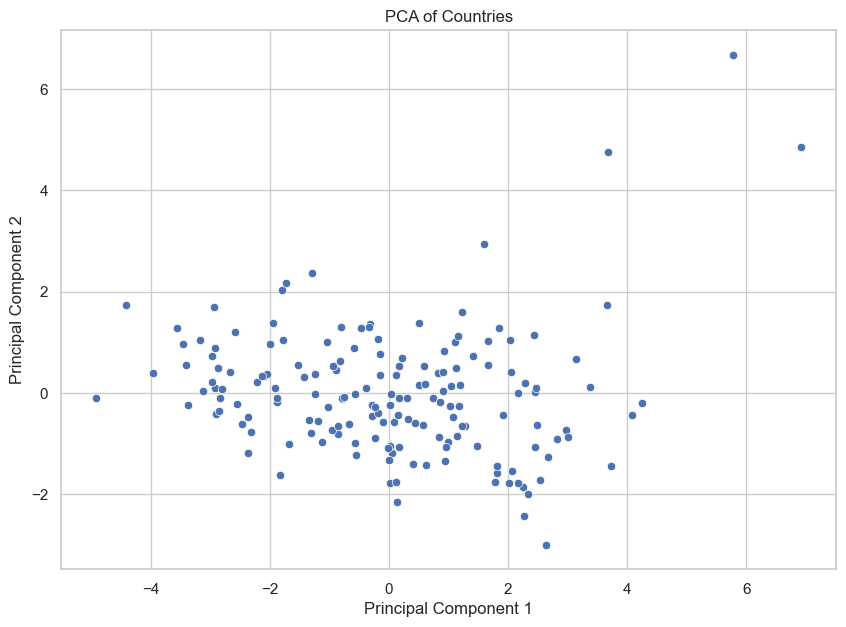

In [17]:
# Principal Component Analysis (PCA)

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=pca_features, columns=['PC1','PC2'])
pca_df['Country'] = df['country']

plt.figure(figsize=(10,7))
sns.scatterplot(x='PC1', y = 'PC2', data= pca_df)
plt.title('PCA of Countries')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

C:\Users\mohit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


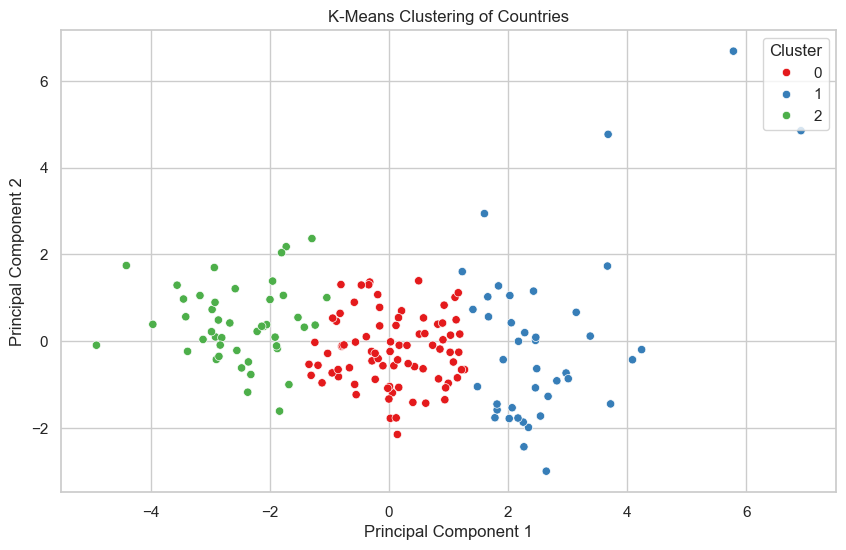

In [18]:
# K-Means Clustering

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(pca_features)
clusters = kmeans.labels_

pca_df['Cluster'] = clusters

plt.figure(figsize=(10,6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data = pca_df, palette='Set1')
plt.title('K-Means Clustering of Countries')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


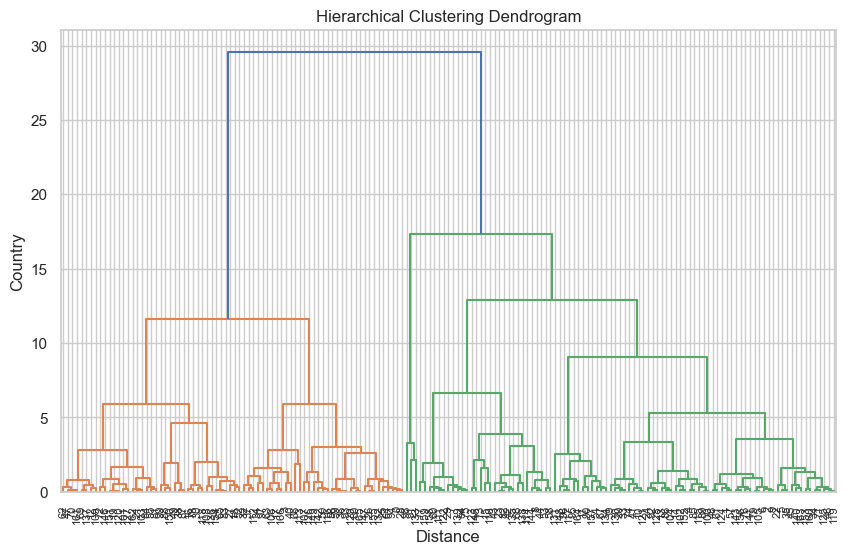

In [20]:
# Hierarchical Clustering

linked = linkage(pca_features,method='ward')

plt.figure(figsize=(10,6))
dendrogram(linked, leaf_rotation=90, leaf_font_size = 8)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Distance')
plt.ylabel('Country')
plt.show()

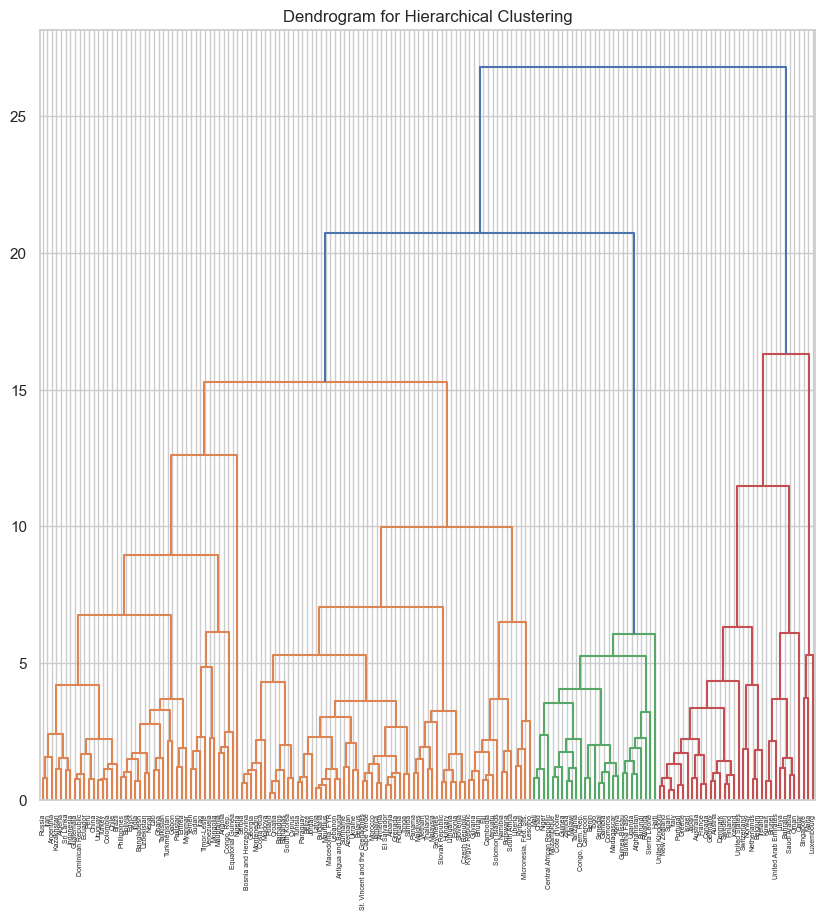

In [21]:
linkeds = linkage(scaled_df,method='ward')

plt.figure(figsize=(10,10))
dendrogram(linkeds, orientation = 'top', labels=df['country'].values, distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()

In [23]:
# Silhouette Score for K-Means

silhouette_avg = silhouette_score(scaled_df,clusters)
print(f"si# Silhouette Score for K-Means:{silhouette_avg}")


si# Silhouette Score for K-Means:0.26455373434877916


In [25]:
target_cluster = pca_df[pca_df['Cluster']==0]

print("Countries in the direst need of aid:")
print(target_cluster['Country'].values)

Countries in the direst need of aid:
['Albania' 'Algeria' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Azerbaijan' 'Bahamas' 'Bangladesh' 'Barbados' 'Belarus' 'Belize'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Bulgaria' 'Cambodia' 'Cape Verde' 'Chile' 'China' 'Colombia'
 'Costa Rica' 'Croatia' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Fiji' 'Georgia' 'Grenada' 'Guatemala' 'Guyana' 'India'
 'Indonesia' 'Iran' 'Iraq' 'Jamaica' 'Jordan' 'Kazakhstan'
 'Kyrgyz Republic' 'Latvia' 'Lebanon' 'Libya' 'Macedonia, FYR' 'Maldives'
 'Mauritius' 'Micronesia, Fed. Sts.' 'Moldova' 'Mongolia' 'Montenegro'
 'Morocco' 'Nepal' 'Oman' 'Panama' 'Paraguay' 'Peru' 'Philippines'
 'Poland' 'Romania' 'Russia' 'Samoa' 'Saudi Arabia' 'Serbia'
 'Solomon Islands' 'South Africa' 'Sri Lanka'
 'St. Vincent and the Grenadines' 'Suriname' 'Tajikistan' 'Thailand'
 'Tonga' 'Tunisia' 'Turkey' 'Turkmenistan' 'Ukraine' 'Uruguay'
 'Uzbekistan' 'Vanuatu' 'Venezuela' 'Vietnam']


In [29]:
# Create a classification table

classification = pd.DataFrame({'Country':df['country'],
                               'Priority':np.where(kmeans.labels_== 0, 'High', np.where(kmeans.labels_== 1, 'Medium','Low'))})

print(classification)

                 Country Priority
0            Afghanistan      Low
1                Albania     High
2                Algeria     High
3                 Angola      Low
4    Antigua and Barbuda     High
..                   ...      ...
162              Vanuatu     High
163            Venezuela     High
164              Vietnam     High
165                Yemen      Low
166               Zambia      Low

[167 rows x 2 columns]


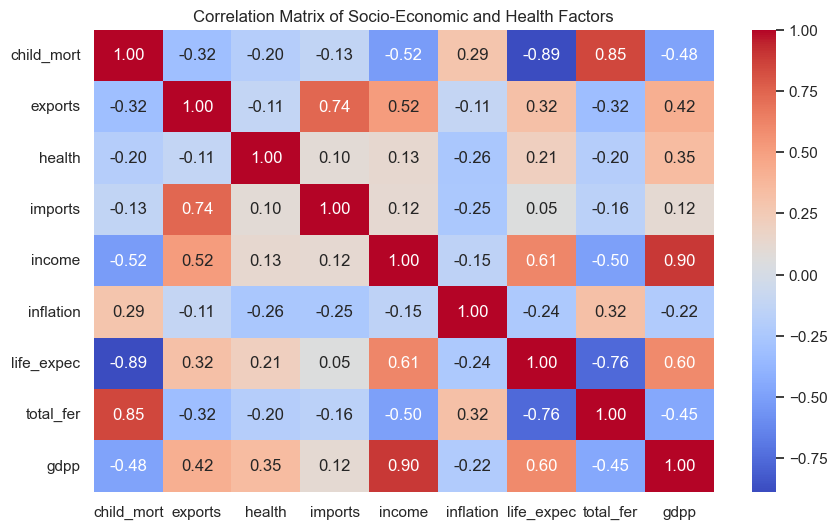

In [31]:
# Heatmaps of correlation Matrix :
numeric_cols = df.select_dtypes(include=[np.number]).columns

corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Socio-Economic and Health Factors')
plt.show()

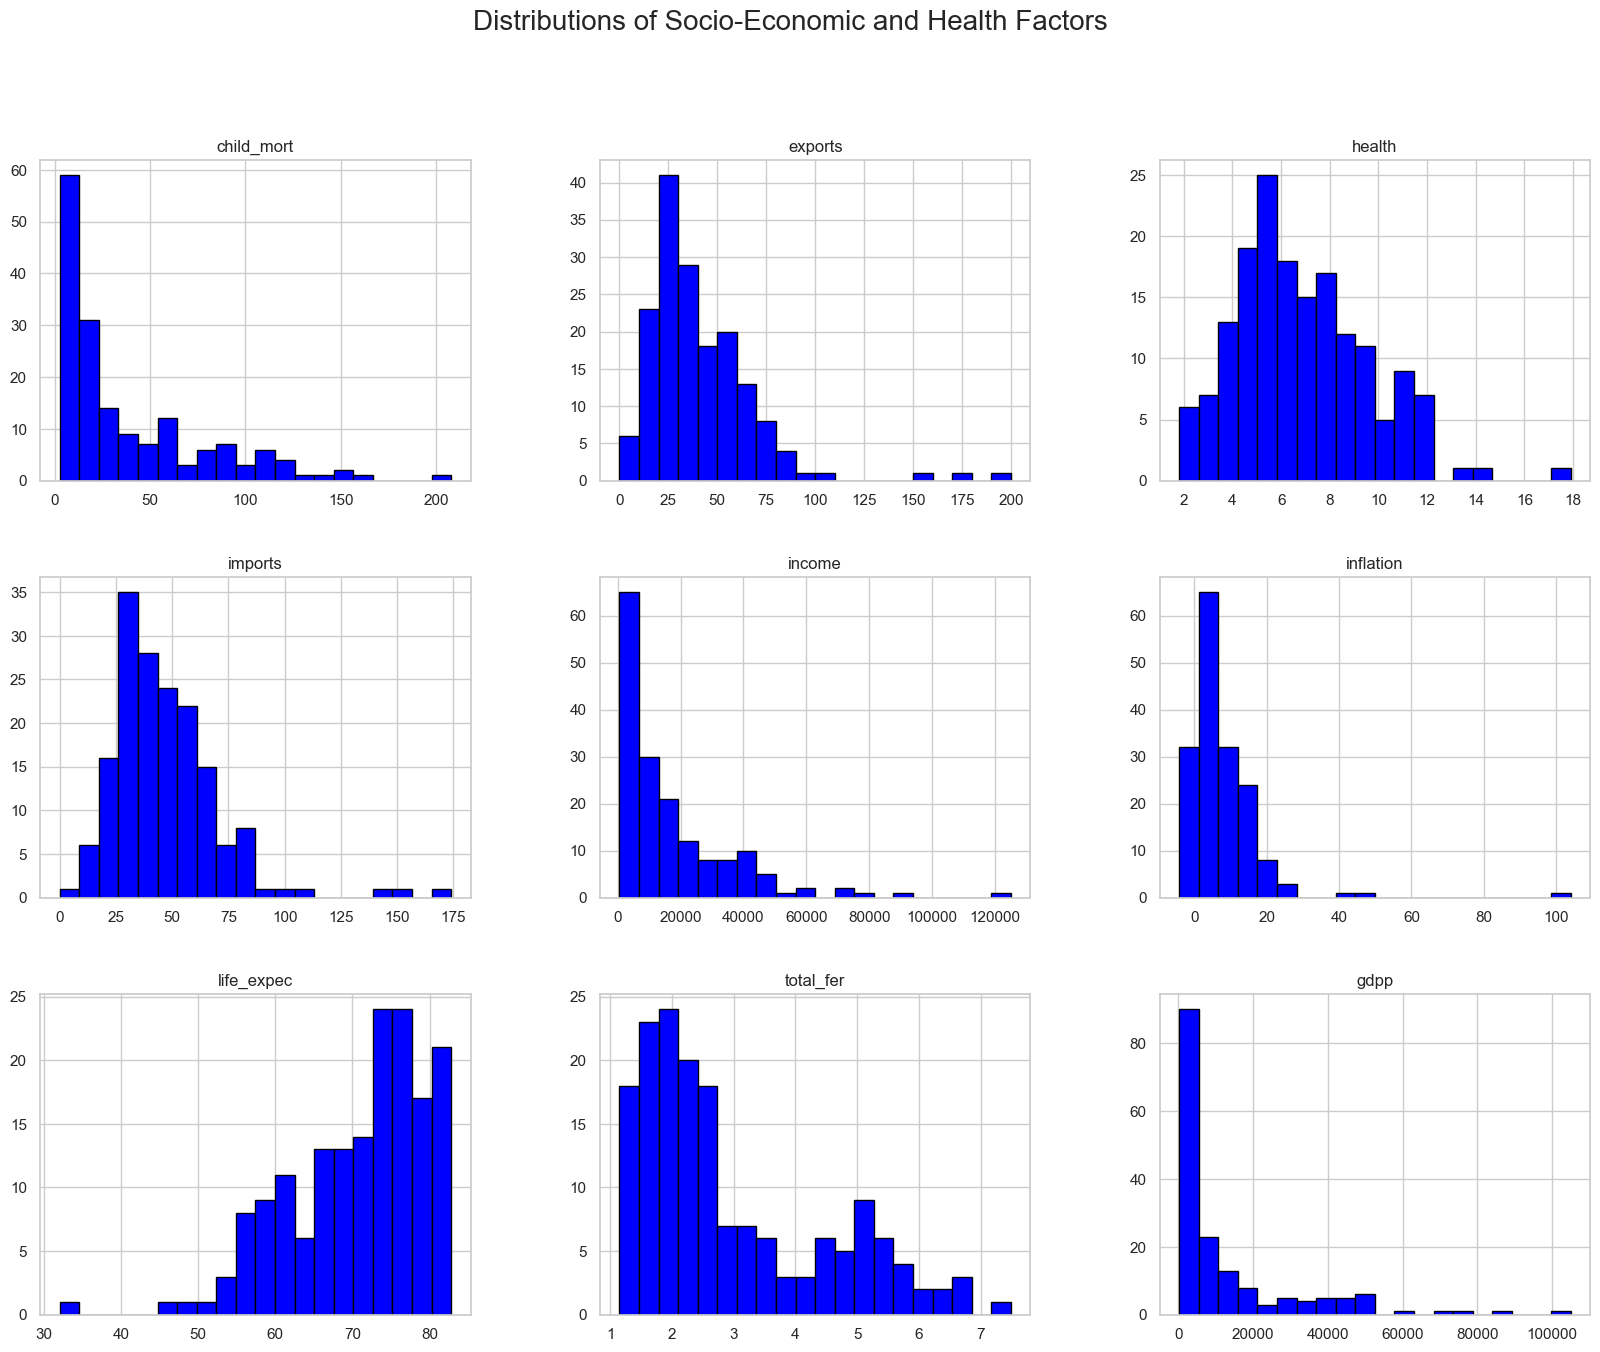

In [32]:
df.hist(bins=20, figsize=(20, 15), color='blue', edgecolor='black')
plt.suptitle('Distributions of Socio-Economic and Health Factors', fontsize=20)
plt.show()

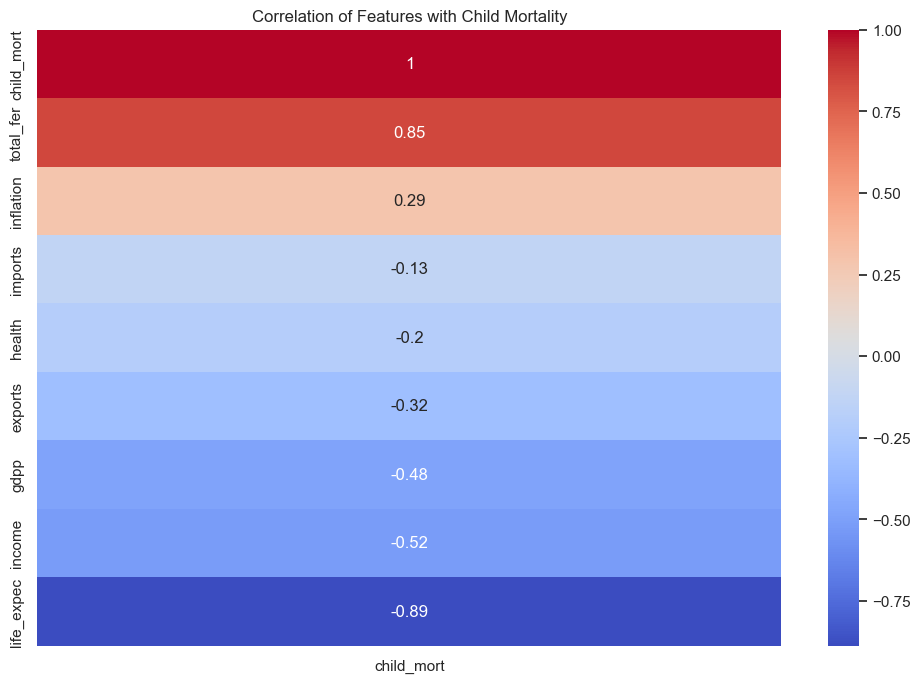

In [33]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.drop('country', axis=1).corr()[['child_mort']].sort_values(by='child_mort', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation of Features with Child Mortality')
plt.show()